In [39]:
'''
Name: Aditya Sawwalakhe
B Number: B00816689
'''

''' Importing required libraries for the program '''

'''Using the same function from the question2.py, addtionally i have 
added the comparision metrics of both methods for both datasets'''

from sklearn import preprocessing
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA


'''loading the dataset files from folder and preprocessing the dataset by removing the NA values'''
df_1 = pd.read_csv('dist1_500_1.txt', sep=" ").dropna()
df_2 = pd.read_csv('dist1_500_2.txt', sep=" ").dropna()
df_3 = pd.read_csv('dist2_500_1.txt', sep=" ").dropna()
df_4 = pd.read_csv('dist2_500_2.txt', sep=" ").dropna()

'''Concatatening the files to form one dataframe per dataset'''
df1 = pd.concat([df_1, df_2])
df2 = pd.concat([df_3, df_4])

'''Defining a function for the applying the PCA algorithm on dataset'''
def applyPCA(df,thershold1):
    '''
    this function takes a df(dataset), thershold(how much information is to be retain) and color of graph as a input
    '''

    '''Now calling the PCA method'''
    pca = PCA()
    pca.fit(df)


    '''Calculating the number of componenets given the thershold (required information retain)'''
    def CalCulateNumberOfComponent(eigen_values,thershold):
        sum_of_all_eigen_value = sum(eigen_values)
        for i in range(1, len(eigen_values)+1):
            if((sum(eigen_values[:i])/sum_of_all_eigen_value) >= thershold):
                return i


    EigenValues = pca.explained_variance_
    K = CalCulateNumberOfComponent(EigenValues,thershold1)
    return [K, thershold1]




''' Importing required libraries for the program '''
from numpy import diff
from scipy.fftpack import dct
from sklearn.cluster import KMeans
from itertools import groupby
        
def applyingDCT(df, color):
    ''' Applying the dct for each vector (each row) for input dataframe(dataset) '''

    dct_array = []
    for i in df.to_numpy():
        dct_array.append(dct(i, type=2))
    
    def doubleDerivative(vector):
        x = np.arange(1, 100)
        firstOrderDerivative = diff(vector)/x
        secondOrderDerivative =  diff(firstOrderDerivative)/diff(x)
        for i in secondOrderDerivative:
            if(i < 0):
                return np.where(secondOrderDerivative == i)[0][0]

    list_of_no_components_for_each_value = [] #this list is to store the critical point for each of the vector 
    for i in dct_array:
        list_of_no_components_for_each_value.append(doubleDerivative(i))

    list_of_no_components_for_each_value.sort()

    kmeans = KMeans(n_clusters=2)  
    X = np.array(list_of_no_components_for_each_value).reshape(-1,1)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    
    plt.scatter(X[:, -1], X[:, 0], c=y_kmeans, s=20)
    centers = kmeans.cluster_centers_
    print centers
    plt.scatter(centers[:, -1], centers[:, 0], c=color, s=200, alpha=0.5)
    plt.show()
    '''Only taking four componenets from the array as fifth component can be seens as outlier(too far from both centers)'''
    return 



for dataset 1 : 
 Number of components  therhsold
                    1       0.40
                    5       0.45
                   10       0.50
                   16       0.55
                   21       0.60
                   28       0.65
                   34       0.70
                   42       0.75
                   50       0.80
                   60       0.85
                   71       0.90
                   83       0.95
                  100       1.00
for dataset 2 : 
 Number of components  therhsold
                    1       0.40
                    1       0.45
                    2       0.50
                    8       0.55
                   15       0.60
                   22       0.65
                   30       0.70
                   38       0.75
                   47       0.80
                   58       0.85
                   69       0.90
                   83       0.95
                  100       1.00
[[1.        ]
 [2.30655391]]


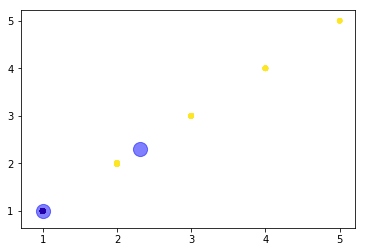

[[2.32854209]
 [1.        ]]


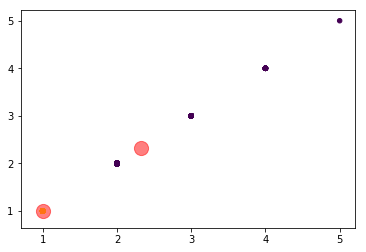

In [40]:
'''Now comparing two feature extraction methods for both dataset '''
thersholdx = np.arange(0.4, 1.05,0.05)
list1 = []
list2 = []
for i in thersholdx:
    list1.append(applyPCA(df1,i))
    list2.append(applyPCA(df2,i))

columns = ["Number of components", "therhsold"]    
table1 = pd.DataFrame(list1, columns = columns)
table2 = pd.DataFrame(list2, columns = columns)
print "for dataset 1 : \n", table1.to_string(index=False)
print "for dataset 2 : \n", table2.to_string(index=False)
applyingDCT(df1, "blue")
applyingDCT(df2, "red")
